C:\Users\hameh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8694 - loss: 0.4697 - val_accuracy: 0.9530 - val_loss: 0.1599
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9620 - loss: 0.1314 - val_accuracy: 0.9657 - val_loss: 0.1162
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9761 - loss: 0.0863 - val_accuracy: 0.9701 - val_loss: 0.1068
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9808 - loss: 0.0679 - val_accuracy: 0.9709 - val_loss: 0.0930
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9859 - loss: 0.0459 - val_accuracy: 0.9737 - val_loss: 0.0901


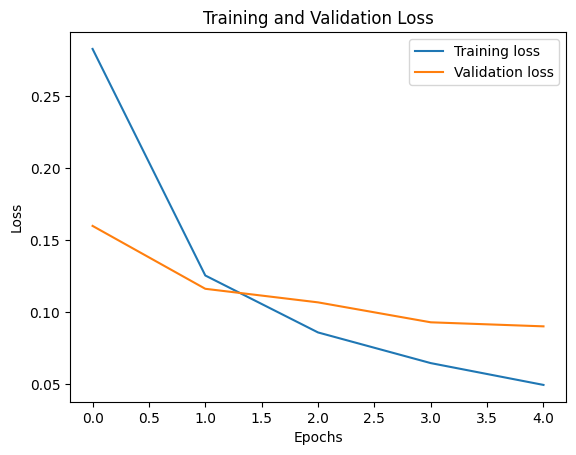

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


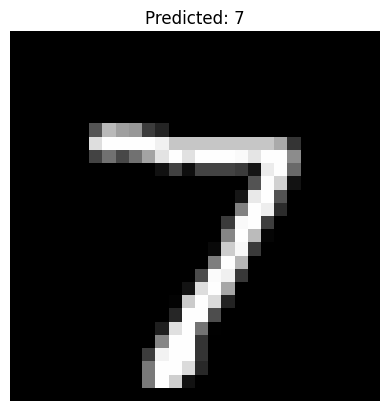

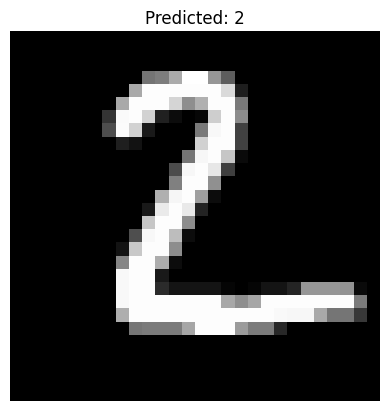

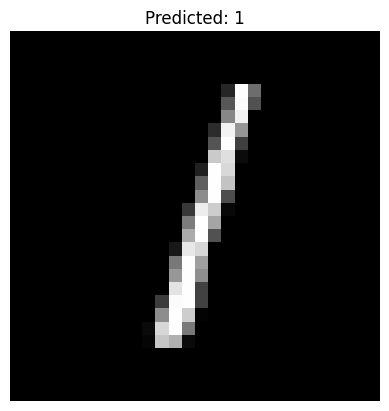

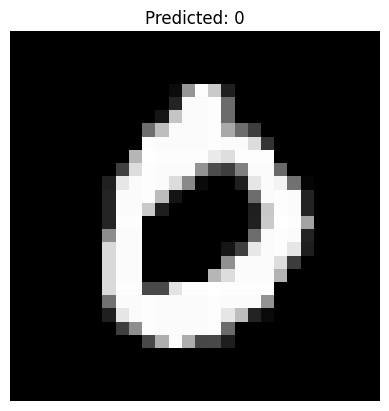

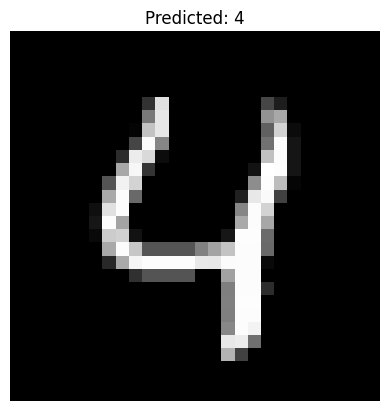

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()
